# Tone, støy og kombinasjon av lyder. Pluss litt om funksjoner.

I denne notebooken skal vi se på hvordan regelmessighet og tilfeldighet henger sammmen med toner og støy. Til slutt skal vi lære oss å kombinere lydsignaler slik at vi kan høre flere signaler samtidig. Vi skal også kjapt innom det som kalles abstraksjon og noen egenskaper til Python-funksjoner.

<div class="alert alert-block alert-info">
<b>Anbefalte forkunnskaper:</b> Litt om tilfeldiget. Grunnleggende om Python-funksjoner.
</div>

# Periodisitet og uregelmessighet – Tone og støy

In [2]:
# Evaluer først denne

from startscript import *

%matplotlib inline

Når vi har brukt sinus-, sagtann- og trekantbølgen i de første Notebookene er disse funksjoner som "gjentar seg selv". Da sier vi at de er periodiske, funksjonsverdiene gjentar seg regelmessig. Et lydsignal med regelmessig svingning, slik som sinusbølgen, oppfatter vi som en tone. Hvor ofte perioden gjentar seg i løpet av et sekund er det vi kaller frekvensen, og det er frekvensen som bestemmer hvilken tone vi hører.

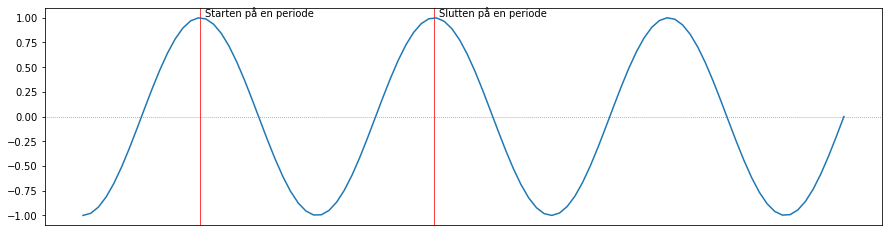

In [3]:
### Denne koden plotter grafen under. Evaluer for å se grafen.
# Det er ikke nødvendig å forstå hvordan koden fungerer.
t = linspace(-.25, 3, 100)
sinusbølge = sin(t * 2 * pi)

figure().set_figwidth(15)
axline((0,0), (1,0), linewidth=0.75, color='gray', linestyle=":")
axline((0.25,0), (0.25,1), linewidth=0.75, color='r', linestyle="-")
axline((1.25,0), (1.25,1), linewidth=0.75, color='r', linestyle="-")
text(0.27, 1.01, "Starten på en periode")
text(1.27, 1.01, "Slutten på en periode")

gca().axes.xaxis.set_visible(False)
plot(t, sinusbølge)
show()

Svingningen må skje veldig fort for at vi skal høre det som en tone. Enstrøken A svinger 440 ganger i sekunder. Noen av de dypeste tonene vi hører svinger 20-30 ganger i sekunder (tenk dyp, dyp rumling) og de lyseste tonene svinger opp mot 20000 ganger i sekundet (tenk pipende hundefløyte).
Men la oss se hva som skjer hvis vi har et lydsignal som ikke inneholder noen regelmessighet, altså at det er basert på tilfeldighet.


`rand`-funksjonen gir oss tilfeldige verdier mellom `0.0` og `1.0`.
Digital lyd og høyttalere fungerer slik at lydsignalet bør være mest mulig jevnt fordelt mellom den positive og negative siden av x-aksen. Da må vi "forskyve" alle de tilfeldige verdiene fra intervallet $[0,1]$ til $[-1,1]$. Det gjør vi ved å multiplisere signalet med 2.0 og deretter trekke fra 1.0.

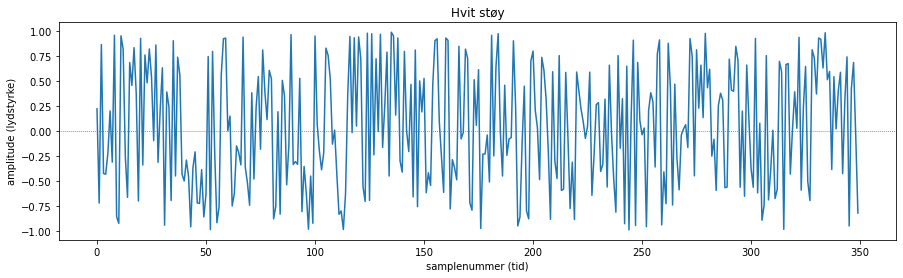

In [4]:
from numpy.random import rand

# Støy. Evaluer cellen.
# Se om grafen ser annerledes ut mellom hver gang.
# Høres lyden annerledes ut?
varighet = 2.0
støy = rand(int(varighet * rate))
støy = (støy * 2) - 1.0   # 'forskyver' til nytt intervall [-1, 1]

spill_av(støy)



# ------------------------------------------------------------
# Kode for å plotte graf:
x = arange(0, 350)  # Viser de 250 første målepunktene
figure().set_figwidth(15)
title("Hvit støy")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
plot(x, støy[0:350])
show()

Som plottet viser så er det ingen periodisitet (eller regelmessighet) i signalet. Da oppfatter vi det som støy! Den støytypen som spilles av her kalles for _hvit støy_. Andre typer støy som _rød støy_ og _rosa støy_ fins også.

La oss definere en funksjon som lager støysignal for oss:

In [2]:
# Evaluer cellen

def hvit_støy_generator(varighet=1.0, amplitude=1.0):
    # Merk at støy ikke tar frekvensparameteret, siden støy ikke har en frekvens
    hvit_støy = rand(int(varighet * rate))
    hvit_støy = (hvit_støy * 2.0) - 1.0  # Skift signal fra [0,1] til [-1, 1]
    hvit_støy = hvit_støy * amplitude
    return hvit_støy

Skriv inn en varighet og test at funksjonen fungerer som forventet ved å evaluere cellen under. Legg merke til at støy ikke har et frekvensparameter, siden støy er uregelmessig ikke har frekvens.

In [8]:
støy = hvit_støy_generator(..., 1)  # Velg varighet, amplitude 1.

spill_av(støy)

## Et lite sidespor: funksjoner og abstraksjon

<div class="alert alert-block alert-info">
<b>Tips:</b> Dette avsnittet er for interesserte og kan fint hoppes over.
</div>

Til nå har vi definert disse funksjonene:

In [9]:
def sinus_generator(frekvens=440, varighet=1.0, amplitude=1.0):
    t = linspace(0., varighet, int(varighet * rate))
    sinusbølge = sin(frekvens * pi * 2 * t) * amplitude
    return sinusbølge

def sagtann_generator(frekvens=440, varighet=1.0, amplitude=1.0):
    t = linspace(0., varighet, int(varighet * rate))
    sagtannbølge = signal.sawtooth(frekvens * pi * 2 * t) * amplitude
    return sagtannbølge

def trekant_generator(frekvens=440, varighet=1.0, amplitude=1.0):
    t = linspace(0., varighet, int(varighet * rate))
    sagtannbølge = signal.sawtooth(frekvens * pi * 2 * t, 0.5) * amplitude
    return sagtannbølge

def hvit_støy_generator(varighet=1.0, amplitude=1.0):
    # Merk at støy ikke tar frekvensparameteret, siden støy ikke har en frekvens
    hvit_støy = rand(int(varighet * rate))
    hvit_støy = (hvit_støy * 2.0) - 1.0  # Skift signal fra [0,1] til [-1, 1]
    hvit_støy = hvit_støy * amplitude
    return hvit_støy

Disse funksjonene tar parametre som frekvens, amplitude (lydstyrke) og varighet. Men hvorfor vil vi definere funksjoner i stedet for å bare skrive alle kodelinjene slik vi gjorde i de første eksemplene?

### Abstraksjon
Når man lager funksjoner som tar hånd om detaljberegningene for oss sier vi at vi abstraherer vekk detaljene. Istedenfor å skrive linjene 
```
frekvens = 440
varighet = 1
amplitude = 1
t = linspace(0., varighet, int(varighet * rate))
sinusbølge = sin(frekvens * pi * 2 * t) * amplitude
```
trenger vi nå kun skrive
```
sinus_generator(440, 1.0, 1.0)
```
Herifra kan vi tenke på `sinus_generator` som en enkel generator som spytter ut en sinusbølge basert på argumentene den får. Abstraksjon er et viktig prinsipp innenfor programmering, og er særlig nyttig når programmene vi skriver blir større og mer omfattende.

### Default parametre og nøkkelord-argumenter
Legg merke til at i funksjonsdefinisjonen har vi gitt parametrene verdier: `def sinus_generator(frekvens=440, varighet=1.0, amplitude=1.0):`. Dette er såkalte "default" parametre. Hvis vi ikke oppgir en argumentverdi når vi kaller på funksjonen brukes default-verdien. I funksjonskallet `sinus_generator(300, 2)` oppgir vi ikke amplitude. Da brukes default-verdien som er `1.0`. Tilsvarende er `sinus_generator(500)` det samme som å kalle på `sinus_generator(500, 1.0, 1.0)`, siden default-verdien til varighet er `1.0` og amplitude er `1.0`.

Når man kaller på funksjoner kan man angi argumentene ved hjelp av såkalte *nøkkelord*:
`sinus_generator(frekvens=600, varighet=3.0, amplitude=1.5)`. Dette funksjonskallet har samme effekt som `sinus_generator(600, 3.0, 1.5)`. I den siste angir vi argumentene basert på deres *posisjon*, mens i den først angir vi argumentene basert på navnet til argumentet, *nøkkelordet*. Når man ikke bruker *nøkkelordargumenter* er det viktig at argumentene oppgis i riktig rekkefølge. Noen ganger vil vi eksplisitt skrive navnene på argumentene for å gjøre koden mer lesbar.

# Kombinere lyder

La oss ta en kikk på grafene vi får fra generatorene våre. Vi skal se en sinusbølge, en trekantbølge, en sagtannbølge og hvit støy i samme plott. Evaluer cellen under og se om det ser ut som forventet

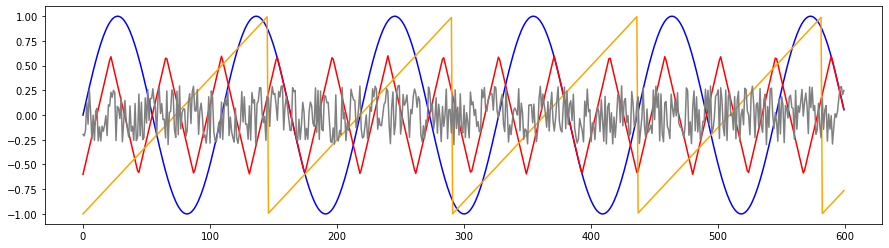

In [22]:
# For å se hvordan signalene ser ut
varighet = 1.0  # Pass på at alle signalene har samme varighet, ellers kommer en feilmelding
sinusbølge = sinus_generator(440, varighet, 1.)       # Frekvens: 800,   varighet: 1 sekund, amplitude: 1
trekantbølge = trekant_generator(1100, varighet, 0.6) # Frekvens: 1100,  varighet: 1 sekund, amplitude: 0.3
sagtannbølge = sagtann_generator(330, varighet, 1.)   # Frekvens: 330,   varighet: 1 sekund, amplitude: 1
hvit_støy = hvit_støy_generator(varighet, 0.3)        # [ikke frekvens], varighet: 1, amplitude: 0.6



# ---------------------------------------------------
# Kode for å plotte graf med alle fire signaler.
antall_samples = 600  # Antall samples som skal vises
figure().set_figwidth(15)
x = arange(0, antall_samples)
plot(x, sinusbølge[:antall_samples], color='blue')
plot(x, trekantbølge[:antall_samples], color='red')
plot(x, sagtannbølge[:antall_samples], color='orange')
plot(x, hvit_støy[:antall_samples], color='gray')
show()

Legg merke til at trekantbølgen har en litt lavere amplitude enn sinus- og sagtannbølgen og at støyen har lavest amplitude av alle signalene. Hvordan ser det ut?

# Kombinere lyder

I grafen i forrige avsnitt plottet vi en sinusbølge, en sagtannbølge og hvit støy. Hver for seg høres disse lydene slik ut:

In [24]:
sinusbølge = sinus_generator(440, 1., 1.)

spill_av(sinusbølge)

In [23]:
sinusbølge = trekant_generator(1100, 1., 1.)

spill_av(sinusbølge)

In [25]:
sagtannbølge = sagtann_generator(330, 1., 1.)

spill_av(sagtannbølge)

In [27]:
hvit_støy = hvit_støy_generator(1., 1.)

spill_av(hvit_støy)

For å kombinere signaler trenger vi kun å summere dem. Fascinerende nok oppfatter øret alle de fire opprinnelige signalene som separate lyder, selv om det er summert til ett enkelt signal! Figuren under viser hvordan grafen ser ut. Hører du alle fire lydene?

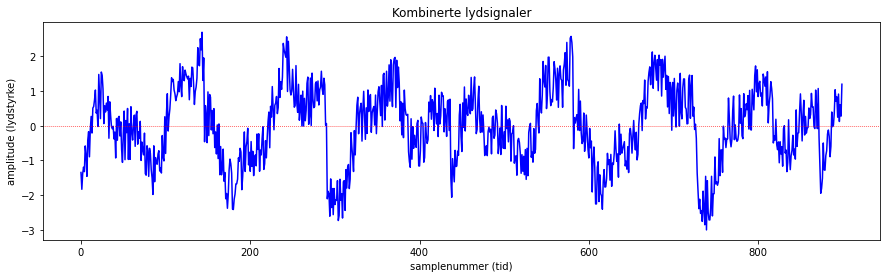

In [56]:
# Evaluer cellen for å høre hvordan signalene høres ut.
# Vi må sørge for at alle signalene har samme varighet, ellers kommer en feilmelding.
varighet = 2.
sinusbølge = sinus_generator(440, varighet, 1.)
trekantbølge = trekant_generator(1100, varighet, 0.6)
sagtannbølge = sagtann_generator(330, varighet, 1.)
hvit_støy = hvit_støy_generator(varighet, 0.8)  # Bruker litt høyere amplitude her

summert_signal = sinusbølge + trekantbølge + sagtannbølge + hvit_støy

spill_av(summert_signal)



# ------------------------------------------------------------
# Kode for å plotte det sammenlagte signalet.
antall_samples = 900  # Antall samples som skal vises
figure().set_figwidth(15)
x = arange(0, antall_samples)
plot(x, summert_signal[:antall_samples], color='blue')
title("Kombinerte lydsignaler")
xlabel("samplenummer (tid)")
ylabel("amplitude (lydstyrke)")
axline((0,0), (1,0), linewidth=0.75, color='r', linestyle=":")
show()

Hvis du evaluerer cellen over flere ganger, ser du kanskje at det skjer små endringer mellom hver evaluering, altså at grafen ikke er helt identisk mellom hver kjøring. Det er på grunn av `hvit_støy_generator`, den gir oss nemlig nye og tilfeldige verdier hver gang cellen evalueres. Men selv om signalet endrer seg hver kjøring, er det mulig å høre forskjell på lydsignalene? Jeg klarer ihvertfall ikke høre forskjell.

## Prøv selv

Siden vi nå har mange parametre som frekvens, varighet, amplitude, hvilke lydgeneratorer vi skal bruke og antall lydgeneratorer finnes det fryktelig mange kombinasjoner å velge mellom. La oss se på parametrene hver for seg.

### A) Test frekvenser
Her har vi allerede satt varighet og amplitude, men ikke frekvenser. Velg og skriv inn frekvenser til lydgeneratorene.
- Velg frekvensene som går opp i hverandre, som med `100`, `200,`, `400`, `700`, osv. Hva får det å si for lyden?
- Hva hvis du velger frekvenser som ikke går opp i hverandre, som med `190`, `440`, `810` og andre vilkårlige tall?

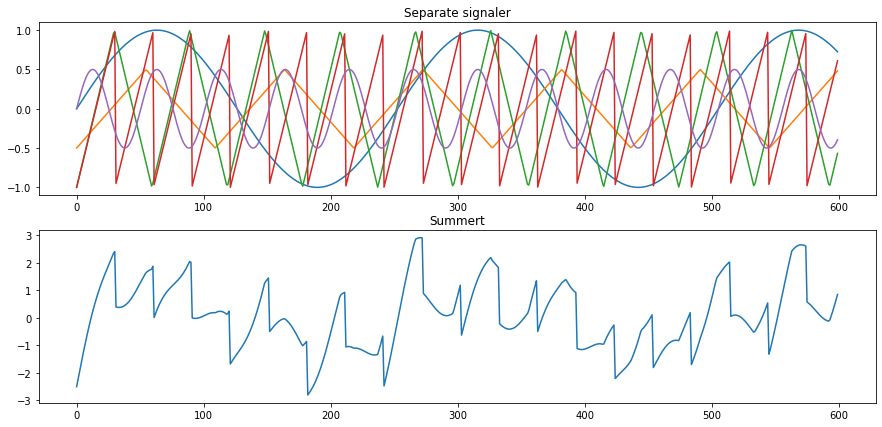

In [59]:
v = 2   # Alle funksjonskallene må bruke samme varighet.

signal_1 = sinus_generator(frekvens=..., varighet=v, amplitude=1.)     # Bruker nøkkelordargumenter her
signal_2 = trekant_generator(frekvens=..., varighet=v, amplitude=0.5)  # ...og her
signal_3 = trekant_generator(..., v, 1.)                               # ...men ikke her
signal_4 = sagtann_generator(..., v)
signal_5 = sinus_generator(..., v, 0.5)

summert_signal = signal_1 + signal_2 + signal_3 + signal_4 + signal_5
spill_av(summert_signal)


# ---------------------------------------------------
# Kode for å plotte grafen med signalene og for å plotte det summerte signalet
# Ikke nødvendig å lese/forstå denne.
alle_signaler = [signal_1, signal_2, signal_3, signal_4, signal_5]  # Liste med alle separate signaler
antall_samples = 600  # Antall samples som skal vises
fig, axs = subplots(2)
fig.set_figwidth(15)
fig.set_figheight(7)

axs[0].set_title("Separate signaler")
axs[1].set_title("Summert")
x = arange(0, antall_samples)
for sig in alle_signaler:
    axs[0].plot(x, sig[:antall_samples])
axs[1].plot(x, summert_signal[:antall_samples])
show()

### B) Test amplitude

Her har vi satt noen frekvenser og varigheter, men ikke amplitude. Amplituden er i intervallet `0.0`-`1.0`. Nå kan du være dirigenten som trekker fram de lydene du ønsker at skal komme tydelig frem, og skjule de lydene du vil at skal ligge i bakgrunnen!

- Velg amplitude-verdier slik at sinustonen stikker frem.
- Velg verdier slik at støyen er tydeligst.
- Velg verdier slik at støyen er i bakgrunnen, sagtannbølgen er "i midten" og sinus- og trekantbølgen er i forgrunnen.

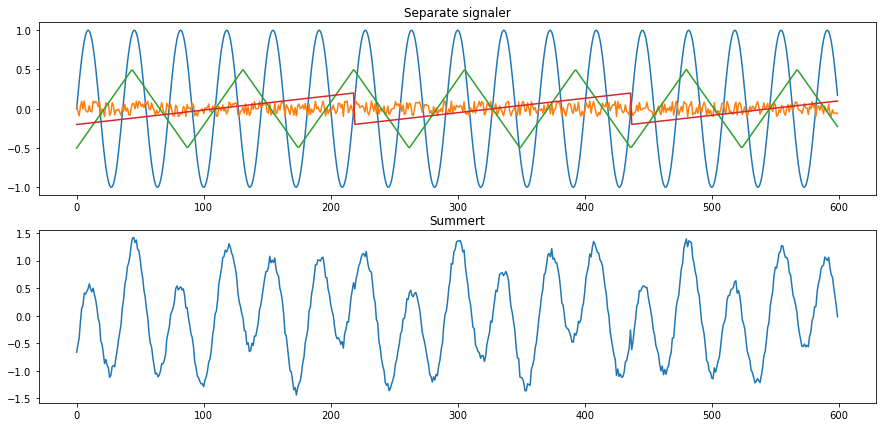

In [64]:
v = 2   # velg varighet. Alle funksjonskallene må bruke samme varighet.

signal_1 = sinus_generator(frekvens=1320, varighet=v, amplitude=1.0)  # Bruker nøkkelordargumenter her
signal_2 = hvit_støy_generator(varighet=v, amplitude=0.1)            # ...og her
signal_3 = trekant_generator(550, v, 0.5)                             # ...men ikke her
signal_4 = sagtann_generator(220, v, 0.2)

summert_signal = signal_1 + signal_2 + signal_3 + signal_4
spill_av(summert_signal)



# ---------------------------------------------------
# Kode for å plotte grafen med signalene og for å plotte det summerte signalet
# Ikke nødvendig å lese/forstå denne.
alle_signaler = [signal_1, signal_2, signal_3, signal_4]  # Liste med alle separate signaler
antall_samples = 600  # Antall samples som skal vises
fig, axs = subplots(2)
fig.set_figwidth(15)
fig.set_figheight(7)

axs[0].set_title("Separate signaler")
axs[1].set_title("Summert")
x = arange(0, antall_samples)
for sig in alle_signaler:
    axs[0].plot(x, sig[:antall_samples])
axs[1].plot(x, summert_signal[:antall_samples])
show()

### C) Fritt frem!

Her kan du prøve deg fritt frem med de kombinasjonene du selv ønsker. Det er mange fryktelig mange kombinasjoner å ta av, så velg deg ut et par parametere å fokusere på!

- Legg til flere lydgeneratorer.
- Bytt ut noen av generatorene med andre generatorer.
- Test med forskjellige frekvenser, både frekvenser som er svært nært og svært langt fra hverandre.
- Bruk amplitude-parameteret til å trekke frem visse lyder og å skjule andre lyder

In [ ]:
v = 2   # velg varighet. Alle funksjonskallene må bruke samme varighet.

signal_1 = sinus_generator(frekvens=330, varighet=v, amplitude=1.)  # Bruker nøkkelordargumenter her
signal_2 = hvit_støy_generator(varighet=v, amplitude=0.5)           # ...og her
signal_3 = trekant_generator(580, v, 1.)                            # ...men ikke her
# signal_4 = ...
# signal_5 = ...

summert_signal = signal_1 + signal_2 + signal_3 # + signal_4 + ...
spill_av(summert_signal)


# For å se plot med alle de seperate signalene, må du skrive inn signal-variablene i listen under
# Listen må samsvare med hvilke variabler som faktisk brukes og er definert,
# ellers vil plottet vise feil, eller du får en feilmelding.

alle_signaler = [signal_1, signal_2, signal_3, ...]



# ---------------------------------------------------
# Kode for å plotte grafen med signalene og for å plotte det summerte signalet
# Ikke nødvendig å lese/forstå denne.
antall_samples = 600  # Antall samples som skal vises
fig, axs = subplots(2)
fig.set_figwidth(15)
fig.set_figheight(7)

axs[0].set_title("Separate signaler")
axs[1].set_title("Summert")
x = arange(0, antall_samples)
for sig in alle_signaler:
    axs[0].plot(x, sig[:antall_samples])
axs[1].plot(x, summert_signal[:antall_samples])
show()